INTRODUCTION :
This dataset provides a detailed view of student lifestyle patterns and their correlation with academic performance, represented by GPA. It contains 2,000 records of students' daily habits across study, extracurriculars, sleep, socializing, and physical activities.



AIM : The aims of analyzing a Student Lifestyle Dataset typically revolve around understanding patterns, behaviors, and their potential impact on academic and personal outcomes.

OBJECTIVES:

1.Identify Lifestyle Patterns:
Understand the common trends and behaviors in students' daily routines, including sleep habits, study hours, diet, and physical activity.

2.Analyze Academic Performance Influencers:
Explore the relationship between lifestyle factors (e.g., sleep duration, study habits, and exercise) and students' academic outcomes, such as grades or GPA.

3.Examine Mental Health and Well-being:
Investigate how factors like stress, anxiety, and depression are related to students' lifestyle choices and external pressures, such as academic workload.

4.Correlate Physical and Mental Health:
Assess the impact of physical activity, diet, and screen time on students' mental health and overall well-being.

5.Support Evidence-Based Interventions:
Provide actionable insights for institutions to design targeted wellness programs, such as workshops on time management, mental health support, or fitness initiatives.



DATA ANALYSIS :
1. Data Overview
Dataset Description: Summarize the dataset structure (number of rows, columns, and key features).
Example: "The dataset contains 1,000 records with 12 features, including demographics, academic performance, lifestyle habits, and mental health indicators."
Key Features:
Demographics: Age, gender, year of study.
Lifestyle Metrics: Sleep duration, physical activity, diet quality, screen time.
Academic Metrics: Study hours, GPA/grades.
Mental Health Indicators: Stress, anxiety, and overall happiness scores.
2. Data Preprocessing
Handling Missing Data:
Check for missing values and handle them appropriately (e.g., imputation, dropping rows/columns).
Example: "10% of sleep duration data was missing, filled using median values."
Outlier Detection:
Identify and treat outliers using boxplots or statistical methods (e.g., Z-scores or IQR).
Example: "Screen time exceeding 15 hours/day was capped to the 99th percentile."
Feature Encoding:
Encode categorical variables (e.g., gender, study year) using label encoding or one-hot encoding.
3. Exploratory Data Analysis (EDA)
Univariate Analysis:
Analyze the distribution of individual features using histograms, bar plots, and summary statistics.
Example: "The average sleep duration was 6.5 hours, with 25% of students sleeping less than 6 hours."
Bivariate Analysis:
Explore relationships between pairs of variables using scatter plots, heatmaps, and correlation matrices.
Example: "A positive correlation (0.45) was observed between study hours and GPA."
Key Insights:
Sleep Patterns vs. Academic Performance: Students with 7–8 hours of sleep tended to perform better academically.
Physical Activity vs. Mental Health: Students who exercised 3+ times per week reported lower anxiety and stress levels.
Screen Time Impact: Excessive screen time (>8 hours) was negatively correlated with both mental health and academic performance.
4. Statistical Analysis
Hypothesis Testing:
Conduct t-tests or ANOVA to compare means (e.g., academic performance across different lifestyle groups).
Example: "Students with regular physical activity had significantly higher GPAs (p < 0.05)."
Correlation Analysis:
Evaluate correlations between continuous variables (e.g., Pearson/Spearman coefficients).
Example: "Strong negative correlation (-0.6) between stress levels and happiness scores."
5. Predictive Modeling (Optional)
Build models to predict outcomes such as GPA or mental health based on lifestyle metrics:
Linear Regression: To predict GPA based on study hours, sleep duration, and screen time.
Classification Models: To predict students at risk of mental health issues (e.g., Logistic Regression, Random Forest).
Model Evaluation:
Assess model performance using metrics like RMSE (regression) or accuracy/F1-score (classification).



In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df=pd.read_csv("/content/student_lifestyle_dataset.csv")
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [3]:
df.isna().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [4]:
df.dtypes

,0
Student_ID,int64
Study_Hours_Per_Day,float64
Extracurricular_Hours_Per_Day,float64
Sleep_Hours_Per_Day,float64
Social_Hours_Per_Day,float64
Physical_Activity_Hours_Per_Day,float64
GPA,float64
Stress_Level,object


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Stress_Level"]=le.fit_transform(df["Stress_Level"])
df.dtypes

,0
Student_ID,int64
Study_Hours_Per_Day,float64
Extracurricular_Hours_Per_Day,float64
Sleep_Hours_Per_Day,float64
Social_Hours_Per_Day,float64
Physical_Activity_Hours_Per_Day,float64
GPA,float64
Stress_Level,int64


In [6]:
X=df.iloc[:,:-1]
X

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,1,6.9,3.8,8.7,2.8,1.8,2.99
1,2,5.3,3.5,8.0,4.2,3.0,2.75
2,3,5.1,3.9,9.2,1.2,4.6,2.67
3,4,6.5,2.1,7.2,1.7,6.5,2.88
4,5,8.1,0.6,6.5,2.2,6.6,3.51
...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04


In [7]:
y=df.iloc[:,-1]
y

,Stress_Level
0,2
1,1
2,1
3,2
4,0
...,...
1995,2
1996,2
1997,2
1998,0


In [8]:
y.value_counts()

,count
Stress_Level,
0,1029
2,674
1,297


In [9]:
#oversampling
from imblearn.over_sampling import SMOTE
over=SMOTE()
X_os,y_os=over.fit_resample(X,y)


In [10]:
y_os.value_counts()

,count
Stress_Level,
2,1029
1,1029
0,1029


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.731185  , -0.40448677,  1.56624592, ...,  0.05654313,
        -1.00589562, -0.42183684],
       [-1.72945295, -1.52845139,  1.30663281, ...,  0.88588186,
        -0.52847018, -1.22559075],
       [-1.7277209 , -1.66894696,  1.65278363, ..., -0.89127256,
         0.10809708, -1.49350872],
       ...,
       [ 1.7277209 , -0.89622129, -1.72218687, ..., -1.12822648,
         2.57479519,  0.08050935],
       [ 1.72945295,  0.4384867 , -1.11642293, ...,  0.47121249,
        -0.09083019, -0.25438811],
       [ 1.731185  ,  1.0707168 , -0.25104588, ...,  0.23425857,
        -0.56825563,  1.55405818]])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=1,test_size=0.3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0,

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       313
           1       0.81      0.72      0.76        90
           2       0.86      0.82      0.84       197

    accuracy                           0.87       600
   macro avg       0.86      0.83      0.84       600
weighted avg       0.87      0.87      0.87       600



In [16]:
from sklearn.svm import SVC
sv=SVC(kernel="poly")
sv.fit(X_train,y_train)

SVC(kernel='poly')

In [17]:
y_pred1=sv.predict(X_test)
y_pred1

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0,

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       313
           1       0.97      0.76      0.85        90
           2       0.78      0.77      0.78       197

    accuracy                           0.84       600
   macro avg       0.87      0.81      0.84       600
weighted avg       0.85      0.84      0.84       600



In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
y_pred2=rf.predict(X_test)
y_pred2

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0,
       2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0,

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       313
           1       0.81      0.72      0.76        90
           2       0.86      0.82      0.84       197

    accuracy                           0.87       600
   macro avg       0.86      0.83      0.84       600
weighted avg       0.87      0.87      0.87       600



In [22]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50,random_state=1)
ad.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [23]:
y_pred3=ad.predict(X_test)
y_pred3

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       313
           1       0.00      0.00      0.00        90
           2       0.69      1.00      0.81       197

    accuracy                           0.81       600
   macro avg       0.56      0.64      0.59       600
weighted avg       0.75      0.81      0.77       600



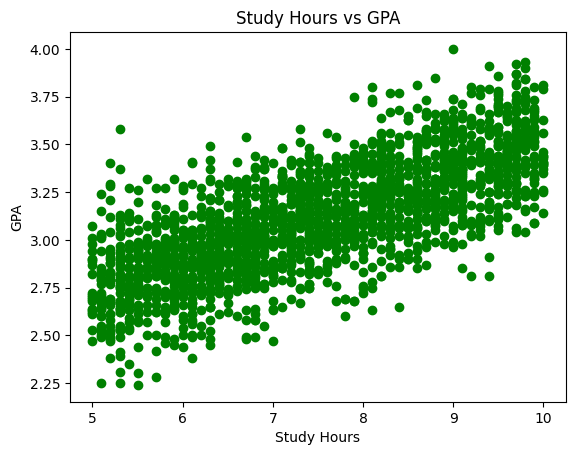

In [25]:
import matplotlib.pyplot as plt
plt.scatter(df['Study_Hours_Per_Day'], df['GPA'], color='green')
plt.title('Study Hours vs GPA')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.show()

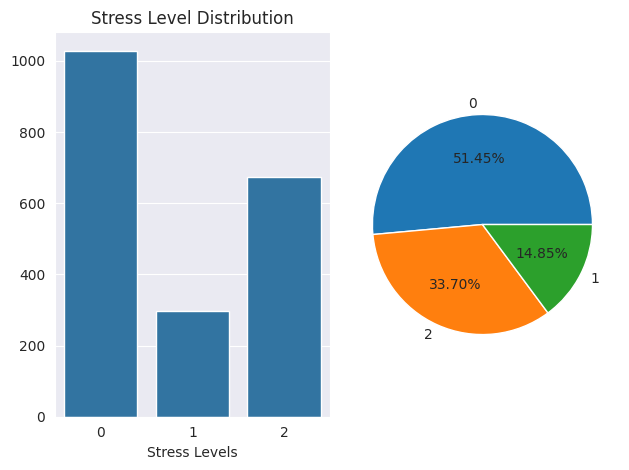

In [26]:
stress = df['Stress_Level'].value_counts()
#plt.figure(figsize=(4,3))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.barplot(x=stress.index, y=stress.values)
plt.xlabel('Stress Levels')
plt.title('Stress Level Distribution')

plt.subplot(1,2,2)
plt.pie(stress, autopct='%.2f%%', labels=stress.index)

plt.tight_layout()
plt.show()


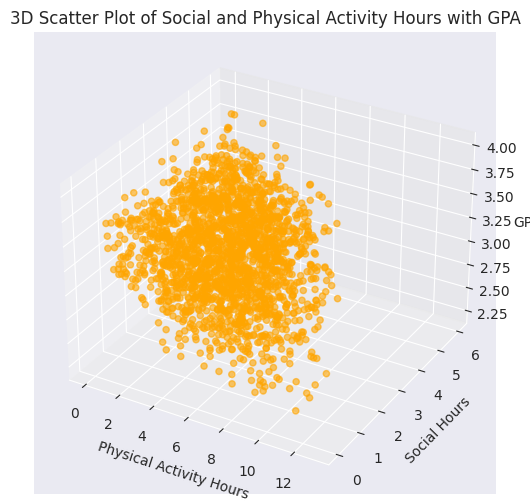

In [27]:
from mpl_toolkits.mplot3d import Axes3D
#set up the figure and3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
#scatter plot
ax.scatter(
    df['Physical_Activity_Hours_Per_Day'],
    df['Social_Hours_Per_Day'],
    df['GPA'],  # replace with actual GPA column
    c='orange',
    marker='o',
    alpha=0.6
)
#set axis labels
ax.set_xlabel('Physical Activity Hours')
ax.set_ylabel('Social Hours')
ax.set_zlabel('GPA')
plt.title('3D Scatter Plot of Social and Physical Activity Hours with GPA')
plt.show()

In [28]:
import joblib

In [29]:
joblib.dump(ad,"model.project")

['model.project']

In [30]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load('model.project')
st.title('STUDENTS LIFESTYLE PREDICTION')
Student_ID=st.slider('Student_ID',1.000000,2000.000000)
Study_Hours_Per_Day=st.slider('Study_Hours_Per_Day',5.000000,10.000000)
Extracurricular_Hours_Per_Day	=st.slider('Extracurricular_Hours_Per_Day	',0.000000,4.000000)
Sleep_Hours_Per_Day=st.slider('Sleep_Hours_Per_Day',5.000000,10.000000)
Social_Hours_Per_Day=st.slider('Social_Hours_Per_Day',0.000000,6.000000)
Physical_Activity_Hours_Per_Day=st.slider('Physical_Activity_Hours_Per_Day',0.00000,13.00000)
GPA=st.slider('GPA',2.240000,4.000000)
input=[[Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA]]
model=joblib.load('model.project')
if st.button('Predict'):
   pred=model.predict(input)
   st.write(f'Prediction:{pred}')

Writing app.py


In [31]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [32]:
!wget -q -O - ipv4.icanhazip.com

34.23.204.118


In [33]:
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.204.118:8501

  Stopping...
^C


CONCLUSION : The analysis of the Student Lifestyle Dataset provides valuable insights into the behavioral patterns, habits, and lifestyle choices of students, as well as their impact on academic performance, well-being, and overall quality of life.The analysis highlights the importance of a balanced lifestyle for students, emphasizing the need for effective time management, physical activity, adequate rest, and stress management. By identifying unhealthy habits and risk factors, educational institutions and students themselves can take proactive measures to improve academic performance, mental health, and overall well-being.

This dataset serves as a valuable resource for understanding how lifestyle factors influence students' success, providing a foundation for further research and targeted interventions.



